# Lab 02. Feature selection and GridSearch


In this lab we will tackle two types of tasks: feature selection and hyperparameter tuning.  

В этой лабораторной работе мы займемся двумя типами задач: выбором функций и настройкой гиперпараметров.


#### Evaluation

Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url.

#### How to submit

- Name your file according to this convention: `lab02_GroupNo_Surname_Name.ipynb`. If you don't have group number, put nan instead.
- Attach it to an email with topic `lab02_GroupNo_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1. Feature Selection [4 points]

In this part of the assignemt you will be offered a task to analyze a dataset and figure out which features are the most important. The first means to solve this problem is to use linear model and examine the weights, another option is to train a logic classifier and see which featires it uses to build the splits. And finally you may use PCA and analyze how new PCA-features are configured.

Firstly, load the data from `feature_selection_sample.txt` and save it into variable `db`.

В этой части задания вам будет предложено проанализировать набор данных и выяснить, какие функции являются наиболее важными. Первым средством решения этой проблемы является использование линейной модели и проверка весов, другой вариант - обучить логический классификатор и посмотреть, какие функции он использует для построения разбиений. И, наконец, вы можете использовать PCA и проанализировать, как настроены новые функции PCA.

Сначала загрузите данные из feature_selection_sample.txt и сохраните их в переменной db.

In [2]:
input_filename = 'feature_selection_sample.txt'
db = pd.read_csv(input_filename, sep='\t', header=None)

Feature columns are `[0-9]` and the target is `[10]`. Split the table into object and target arrays:

In [3]:
X = db.drop(columns=10)
Y = db[10]

Now split the data into train and test

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
RANDOM_SEED = 42

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=RANDOM_SEED)

**Task 1.1 [1 point] Linear models**

Import `LinearRegression` and define a problem with default parameters.

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model_lr = LinearRegression()

Train the model and check the quality both on train set and test set. Since we are solving a regression problem, we will use `mean_squared_error` as a quality metric.

Обучите модель и проверьте качество как на наборе, так и на тестовом наборе. Поскольку мы решаем проблему регрессии, мы будем использовать mean_squared_error в качестве показателя качества.

In [9]:
from sklearn.metrics import mean_squared_error #среднеквадратичная ошибка

In [10]:
model_lr.fit(X_train,Y_train)           # обучение выборке X, Y

train_pred  = model_lr.predict(X_train) # предсказанный
test_pred   = model_lr.predict(X_test)

train_score = mean_squared_error(train_pred, Y_train)  
test_score  = mean_squared_error(test_pred,  Y_test)   

print("Linear Regression scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))
original_test_score = test_score 

Linear Regression scores: train: 5.814, test: 6.916


Extract feature-vector from the trained model (see [this page](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)) and bar-plot them.

Извлеките вектор признаков из обученной модели (см. Эту страницу) и постройте их.

Save 4 most important feature indexes to a list:

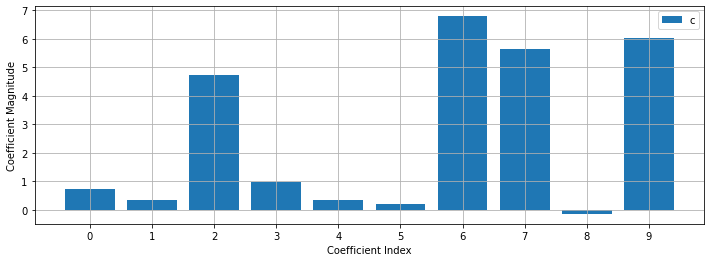

In [11]:
model_coefs = model_lr.coef_
ncoef = model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x, model_coefs)
plt.xticks(default_x)
plt.xlabel('Coefficient Index')    
plt.ylabel('Coefficient Magnitude')
plt.legend('coefs', loc='upper right')
plt.grid()
plt.show()

According to this plot, what are the most important features?

Согласно этому сюжету, каковы наиболее важные особенности?

**Your answer here**: 2, 6, 7, 9 особенности наиболее важные

In [12]:
important_feature_idx  = [2, 6, 7, 9]

Use these feature indexes to construct new train and test sets with smaller amount of features:

Используйте эти индексы функций для создания новых наборов поездов и тестов с меньшим количеством функций:

In [13]:
X_train_smaller = X_train[important_feature_idx]
X_test_smaller  = X_test[important_feature_idx]

Define a new `LinearRegression` model, train and test it on new sets: 

Определите новую модель LinearRegression, обучите и протестируйте ее на новых наборах:

In [14]:
smaller_model = LinearRegression()
smaller_model.fit(X_train_smaller, Y_train)
train_pred    =  smaller_model.predict(X_train_smaller) 
test_pred     =  smaller_model.predict(X_test_smaller) 
train_score   =  mean_squared_error(train_pred, Y_train)
test_score    =  mean_squared_error(test_pred, Y_test)
print("{} train score: {:.3f}, test score: {:3.3f}".format('Smaller LR', train_score, test_score))
smaller_test_score = test_score

Smaller LR train score: 22.244, test score: 26.171


Compare scores of `model_lr` (variable `original_score`) and `smaller_model` (variable `smaller_test_score`). We reduced number of feature but why scores changes so drastically?

Сравните оценки model_lr (переменная original_score) и small_model (переменная small_test_score). Мы сократили количество функций, но почему так резко меняются оценки?

In [15]:
print(np.abs(original_test_score - smaller_test_score))

19.254561657742606


**Your answer here**: Ошибка стала намного больше. Не верно выбраны наиболее важные особенности.

**Task 1.2 [1 point] Linear models on scaled data**

It is time to fix this failure and scale the data - we should have done it earlier, since we decided to use linear models. Import the scaler and apply it to all of the data (`X`)

Пора исправить этот сбой и масштабировать данные - мы должны были сделать это раньше, так как решили использовать линейные модели. Импортируйте средство масштабирования и примените его ко всем данным (X)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
st_scaler = StandardScaler()
X_scaled  = pd.DataFrame(st_scaler.fit_transform(X), columns=None)

Now we repeat all the steps:
- split the data
- train a model on all features
- plot coefficients
- choose 4 most-important features
- train a model on a feature-subset
- compare the scores
- profit!

In [18]:
X_sc_train, X_sc_test, Y_sc_train, Y_sc_test = train_test_split(X_scaled, Y, test_size=0.1, random_state=RANDOM_SEED)

In [19]:
model_lr_sc = LinearRegression()
model_lr_sc.fit(X_sc_train, Y_train)
train_pred  = model_lr_sc.predict(X_sc_train)
test_pred   = model_lr_sc.predict(X_sc_test)
train_score = mean_squared_error(train_pred, Y_train)
test_score  = mean_squared_error(test_pred, Y_test)
print("Linear Regression on Scaled Data scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))

Linear Regression on Scaled Data scores: train: 5.814, test: 6.916


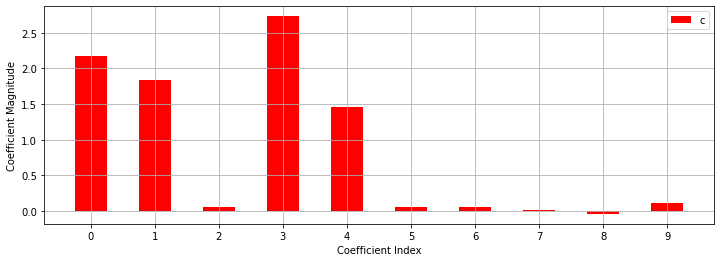

In [20]:
model_coefs = model_lr_sc.coef_

ncoef = model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x, model_coefs,label='model_name', width=0.5, color = 'red')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend('coefs', loc='upper right')
plt.grid()
plt.show()

What are the most important features now? Let's do the sanity check and train on this subset:

In [21]:
important_feature_idx = [0,1,3,4] 

In [22]:
X_sc_train_smaller = X_sc_train[important_feature_idx]
X_sc_test_smaller = X_sc_test[important_feature_idx]

In [23]:
model_lr_sc_smaller = LinearRegression()
model_lr_sc_smaller.fit(X_sc_train_smaller, Y_train)
train_pred  = model_lr_sc_smaller.predict(X_sc_train_smaller)
test_pred   = model_lr_sc_smaller.predict(X_sc_test_smaller)
train_score = mean_squared_error(train_pred, Y_train)
test_score  = mean_squared_error(test_pred, Y_test)
print("Linear Regression on Scaled Data scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))

Linear Regression on Scaled Data scores: train: 5.841, test: 6.856


Has **MSE** changed? To what extent?

**Your answer here**: Очень слабо изменилось

**Task 2 [2 points] Decision Tree**

As you probably now, there are models that are not influence by the fact that data is not normalized: for example, Decision Tree or Random Forest.

Since you already have all the sets prepared: `X_train` and `X_sc_train`, train a RF model and prove that scaling does not affect feature importances.

Then compare durations of training loops for a set with 10 features and 4 features.

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf        = RandomForestRegressor()
rf_scaled = RandomForestRegressor()

In [26]:
rf.fit(X_train, Y_train)
rf_scaled.fit(X_sc_train, Y_sc_train)

rf_test_score = rf.score(X_test, Y_test)                                    
rf_scaled_test_score =  rf_scaled.score(X_sc_test, Y_sc_test)            

print("RF test score {:.3f}".format(rf_test_score))
print("RF scaled test score {:.3f}".format(rf_scaled_test_score))

RF test score 0.882
RF scaled test score 0.889


Look up an attribute for feature importances [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random%20forest#sklearn.ensemble.RandomForestRegressor)

https://dyakonov.org/2016/11/14/%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B9-%D0%BB%D0%B5%D1%81-random-forest/

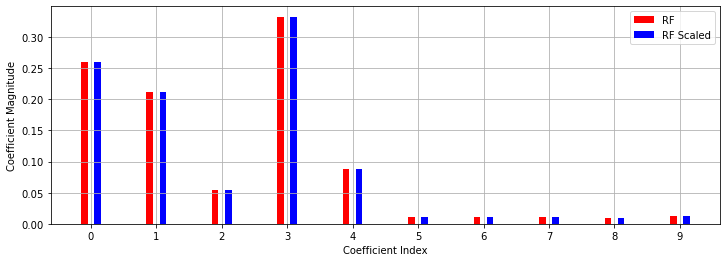

In [27]:
rf_model_coefs = rf.feature_importances_                   
rf_scaled__model_coefs = rf_scaled.feature_importances_ 

ncoef = rf_model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x - 0.1, rf_model_coefs, label="RF", width=0.1, color = 'red')
plt.bar(default_x + 0.1, rf_model_coefs, label="RF Scaled", width=0.1, color = 'blue')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()


**Your Comment on the plot:** одинаковые


Now examine how reduction of . You may use `time` module.

Here is an example:

In [28]:
from time import time

n = 1000
a = np.diag(np.ones(n)) + np.random.rand(n, n)

start = time()
det = np.linalg.det(a)
end = time()
print("{} x {} matrix determinant took {:.3f} seconds".format(n, n, end - start))

1000 x 1000 matrix determinant took 0.189 seconds


c:\users\пользователь\appdata\local\programs\python\python38-32\lib\site-packages\numpy\linalg\linalg.py:2159: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [29]:
rf1 = RandomForestRegressor()
rf2 = RandomForestRegressor()

In [30]:
start = time()
rf1.fit(X_sc_train, Y_sc_train)
end = time()
print('Масштабированно:', end - start)

start = time()
rf2.fit(X_sc_train_smaller, Y_sc_train)
end = time()
print('Масштабированно и убраны "неважные" столбцы:', end - start)

Масштабированно: 0.6160492897033691
Масштабированно и убраны "неважные" столбцы: 0.4250483512878418


**Your Comment on time consuption**: времени ушло почти в 2 раза меньше

## Part 2. GridSearch: hyperparameter tuning  [11 points]

In this part we will try to solve a multiclass classification task on Richter's dataset ([source](https://www.kaggle.com/mullerismail/richters-predictor-modeling-earthquake-damage)). The aim is to predict damage rate (label from 1 to 3).

We will experiment with following models:
- kNN
- LinearRegression
- DecisionTree
- RandomForest

В этой части мы попытаемся решить задачу мультиклассовой классификации на наборе данных Рихтера. Цель состоит в том, чтобы предсказать степень повреждения (метка от 1 до 3). 

Мы будем экспериментировать со следующими моделями:
- kNN
- LinearRegression
- DecisionTree
- RandomForest


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read the data, transform the table into arrays `X` and `y`, target column is called *damage_grade*. Note that objects are described with both numerical and categorical features. In the first part of this assignment we will use numerical features only (apply `_get_numeric_data()` to `pandas` dataframe).

Split the data into `train`, `test` and `val` with ratio 4-to-2-to-1. Since we are going to use metric classifiers, don't forget to preprocess the data.

In [32]:
RANDOM_SEED = 42

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [34]:
data    = pd.read_csv("richters_sample.csv")
objects = data.drop(columns="damage_grade")
labels  = data["damage_grade"]

In [35]:
X = objects._get_numeric_data()
y = labels
assert X.shape == (35000, 31) and  y.shape == (35000,)

In [36]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=None)

In [37]:
X_train, X_not_train, y_train, y_not_train = train_test_split(X, y, test_size= 3/7, 
                                                    shuffle=True, stratify = None,
                                                    random_state = RANDOM_SEED)

X_test, X_val, y_test, y_val = train_test_split(X_not_train, y_not_train, test_size= 1/3,
                                                    shuffle=True, stratify= None,
                                                    random_state = RANDOM_SEED)

assert X_train.shape[0] == 20000 and X_test.shape[0] == 10000 and X_val.shape[0] == 5000

Import the models:

In [38]:
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import RandomForestClassifier

Import classification quality metrics:

In [39]:
from sklearn.metrics      import accuracy_score, precision_score, recall_score

**Task 2.1 [2 points]. Default-parameter models**

Let's take 4 classifiers (1 of a kind) with **default** parameters and check how well they can perform.

In [40]:
clf1 = KNeighborsClassifier()
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier()

default_classifiers = [clf1, clf2, clf3, clf4]

Fit each classifier on `X_train, y_train`, predict on `X_test`

In [41]:
clf_predictions = []
for clf in default_classifiers:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    clf_predictions.append(pred)

Apply 5 metrics to each prediction:

In [42]:
accuracies       = [accuracy_score(y_test, pred) for pred in clf_predictions] #Классификационная оценка точности
micro_precisions = [precision_score(y_test, pred, average="micro") for pred in clf_predictions] #точность, zero_division=1
micro_recalls    = [recall_score(y_test,    pred, average="micro") for pred in clf_predictions]
macro_precisions = [precision_score(y_test, pred, average="macro") for pred in clf_predictions]
macro_recalls    = [recall_score(y_test,   pred, average="macro") for pred in clf_predictions]

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls]
names  = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls"]

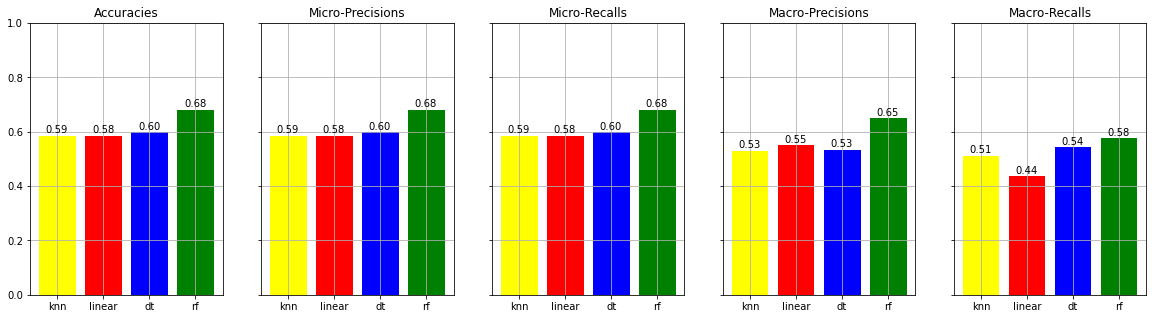

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["knn", "linear", "dt", "rf"]
colors = ["yellow", "red", "blue", "green"]
xticks = 1 + np.arange(len(xlabels))

for ax, score, name in zip(axs, scores, names):
    ax.bar(xticks, score, color=colors)
    for i, v in enumerate(score):
        ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    ax.set_title(name)
    ax.grid()

plt.show()

Choose the model with the biggest gap between micro-precision and macro-precision and plot its confusion matrix.
For confusion matrix do `from sklearn.metrics import confusion_matrix` (don't forget to put valid labels on plots).

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [45]:
weakest_model_index = 0    #оно меняется 
dt_preds = clf_predictions[weakest_model_index]
conf_matrix = confusion_matrix(dt_preds,y_test) 

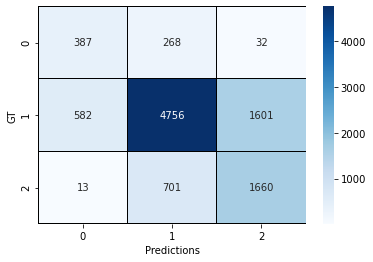

In [46]:
plot_labels = sorted(labels.unique())

sns.heatmap(conf_matrix, 
            cmap="Blues",
            xticklabels=True,
            yticklabels=True,
            linewidths=0.01, 
            linecolor="black", 
            annot = True, 
            fmt='2g')

plt.ylabel("GT")
plt.xlabel("Predictions")
plt.show()

Going by confusion matrix, which class is the hardest to predict? How does it affect macro/micro-precision?

Исходя из матрицы путаницы, какой класс труднее всего предсказать? Как это влияет на макро / микроточность?

**Your answer:** 

In [183]:
print('Ошибки: ', 268 + 32, 582 + 1601,13 + 701, sep = '\n')

Ошибки: 
300
2183
714


Таким образом ошибок больше всего в 1 классе, но и предсказаний там больше всего

In [185]:
print('В процентах:', 300/(300+387), 2189/(2183+4756), 714/(714+1660), sep = '\n')

В процентах:
0.4366812227074236
0.3154633232454244
0.3007582139848357


В процентах больше ошибок в 0 классе

**Task 2.2 [3 points]. 1-D Grid Search**

No wonder that default models have scores far from perfect. Let's tweak those hyperparameters with GridSearch: we will iteratively look through all combinations of parameters in the grid and choose the best. At each iteraction use cross validation score with number of folds `k=5`.

Неудивительно, что оценки моделей по умолчанию далеки от идеала. Давайте настроим эти гиперпараметры с помощью GridSearch:итеративно просмотрим все комбинации параметров в сетке и выберем лучшую. На каждой итерации используйте оценку перекрестной проверки с количеством складок k = 5


Firstly, build the grid for kNN. It will be a 1-D grid with the only parameter `n_neighbors`. Look through all values from 1 to 50.

Сначала постройте сетку для кНН. Это будет одномерная сетка с единственным параметром n_neighbors. Просмотрите все значения от 1 до 50.

*Hint*: 
 - `np.arange` - возвращает одномерный массив с равномерно разнесенными значениями внутри заданного интервала
 - `np.linspace` - возвращает одномерный массив из указанного количества элементов, значения которых равномерно распределенны внутри заданного интервала
 - `np.logspace` - возвращает одномерный массив из указанного количества элементов, значения которых равномерно распределенны по логарифмической шкале внутри заданного интервала
are very useful for grid constructions.

**Attention** this part of assignment may need a lot of computational powers (as you probably remember, training of knn is quite expensive). 

эта часть задания может потребовать больших вычислительных мощностей (как вы, вероятно, помните, обучение knn довольно дорогое).

To save some resources while doing grid search for knn you may use the trick from Part1: do feature-selection with DTree/RandomForest and select top-5 or top-10 features.

Чтобы сэкономить ресурсы при выполнении поиска по сетке для knn, вы можете использовать трюк из Части 1: выполнить выбор функций с помощью DTree / RandomForest и выбрать топ-5 или топ-10 функций.


In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV # находит наилучшие параметры, путем обычного перебора

In [48]:
knn_clf = KNeighborsClassifier()              # k-ближайших соседей
knn_grid = {"n_neighbors": np.arange(1,51)}   #,51

In [49]:
rfc = RandomForestClassifier() #LinearRegression()
rfc.fit(X_train, y_train)

RandomForestClassifier()

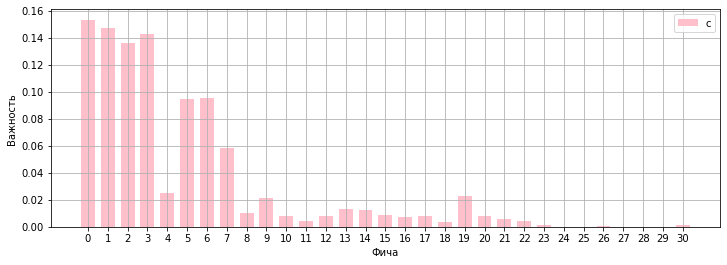

In [50]:
rfc_coefs = rfc.feature_importances_  # возвращает вектор "важностей" признаков


In [51]:
index = [0, 1, 2, 3, 5, 6, 7]

In [52]:
X_train_smaller = X_train[index] 
X_test_smaller  = X_test[index]
X_val_smaller   = X_val[index]

In [54]:
knn_grid_searcher = GridSearchCV(knn_clf, param_grid=knn_grid, cv=5, return_train_score=True, n_jobs=-1) 
knn_grid_searcher.fit(X_train_smaller, y_train)
print('Наилучший параметр: ', knn_grid_searcher.best_params_["n_neighbors"])

Наилучший параметр:  38


In [58]:
knn_clf = KNeighborsClassifier(n_neighbors = 38)  
knn_clf.fit(X_train_smaller, y_train)

KNeighborsClassifier(n_neighbors=38)

In [59]:
pred = knn_clf.predict(X_test_smaller)
mse  = mean_squared_error(pred, y_test)
print('Среднеквадратичная ошибка', mse)

Среднеквадратичная ошибка 0.4278


In [60]:
print('Cредний балл перекрестной проверки: ', knn_grid_searcher.best_score_)

Cредний балл перекрестной проверки:  0.5893499999999999


Plot mean cross-validation score for each hyperparameter:
- X-axis is hyperparameter values
- Y-axis is mean CV-score


Постройте средний балл перекрестной проверки для каждого гиперпараметра: 
- Ось X - значения гиперпараметров. 
- Ось Y - средний CV-балл.


To show variance of obtained estimatets add *mean + 3 stds* and *mean - 3 stds* to the plot. You may use `plt.fill_between` to make it more descriptive (it will look like a coridor around the mean).

Чтобы показать дисперсию полученных оценок, добавьте к графику среднее + 3 стандартных значения и среднее - 3 стандартных условия. Вы можете использовать plt.fill_between, чтобы сделать его более наглядным (он будет выглядеть как коридор вокруг среднего значения).

To get values we need to plot search in `knn_grid_searcher` parameters and attributes.

Для получения значений нам нужно построить поиск по параметрам и атрибутам knn_grid_searcher.

In [61]:
means = knn_grid_searcher.cv_results_['mean_test_score']
stds  = knn_grid_searcher.cv_results_['std_test_score']

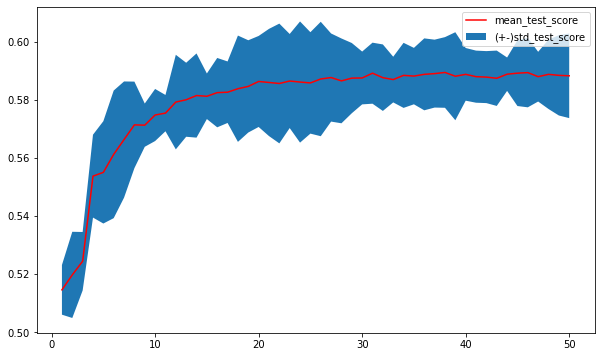

In [62]:
plt.figure(figsize=(10, 6))
xs = knn_grid_searcher.param_grid["n_neighbors"]
plt.plot(xs, means, color = 'red')
plt.fill_between(xs, means + 3*stds, means - 3*stds)
plt.legend(['mean_test_score', '(+-)std_test_score'])
plt.show()

Print the best estimator and its score:

In [63]:
scores = cross_val_score(knn_grid_searcher, X_val_smaller, y_val, cv=5, n_jobs=1)

In [64]:
print('Оценки точности на 5 тестовых подмножествах:', scores)

Оценки точности на 5 тестовых подмножествах: [0.573 0.571 0.563 0.567 0.568]


In [65]:
print('Наилучшая оценка:', max(scores))

Наилучшая оценка: 0.573


Now do the same for 3 other models:
- Decision Tree: grid search the `max_depth` parameter
- LogisticRegression: `penalty`
- RandomForest: `n_estimators`

Some of the hyperparameters are not numeric, but categorical (like `penalty`) and you should choose some other way to plot cv-scores instead of `plt.plot`

In [66]:
dt_clf = DecisionTreeClassifier()
dt_grid = {"max_depth": np.arange(1,51)}    # Максимальная глубина дерева

In [67]:
dt_grid_searcher = GridSearchCV(dt_clf, param_grid=dt_grid, cv=5, return_train_score=True, n_jobs=-1) 
dt_grid_searcher.fit(X_train_smaller, y_train)
print('Наилучший параметр: ', dt_grid_searcher.best_params_["max_depth"])

Наилучший параметр:  5


In [68]:
dt_clf = DecisionTreeClassifier(max_depth = 5)
dt_clf.fit(X_train_smaller, y_train)

DecisionTreeClassifier(max_depth=5)

In [69]:
pred = dt_clf.predict(X_test_smaller)
mse  = mean_squared_error(pred, y_test)
print('Среднеквадратичная ошибка', mse)

Среднеквадратичная ошибка 0.3595


In [70]:
means = dt_grid_searcher.cv_results_['mean_test_score']
stds  = dt_grid_searcher.cv_results_['std_test_score']

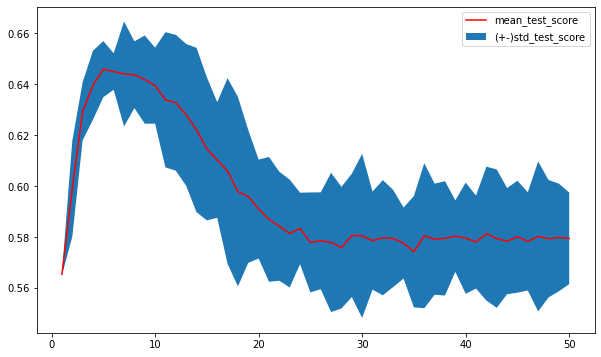

In [71]:
plt.figure(figsize=(10, 6))
xs = dt_grid_searcher.param_grid["max_depth"]
plt.plot(xs, means, color = 'red')
plt.fill_between(xs, means + 3*stds, means - 3*stds)
plt.legend(['mean_test_score', '(+-)std_test_score'])
plt.show()

In [72]:
scores = cross_val_score(dt_grid_searcher, X_val_smaller, y_val, cv=5, n_jobs=1)
print('Оценки точности на 5 тестовых подмножествах:\n', scores)
print('Наилучшая оценка:', max(scores))

Оценки точности на 5 тестовых подмножествах:
 [0.638 0.632 0.633 0.63  0.642]
Наилучшая оценка: 0.642


In [73]:
lg_clf = LogisticRegression()
lg_grid = {"penalty": np.array(['l1', 'l2', 'elasticnet', 'none'])}  # Используется для указания нормы, применяемой при наложении штрафов

In [75]:
lg_grid_searcher = GridSearchCV(lg_clf, param_grid=lg_grid, cv=5, return_train_score=True, n_jobs=-1) 
lg_grid_searcher.fit(X_train_smaller, y_train)
print('Наилучший параметр: ', lg_grid_searcher.best_params_["penalty"])

Наилучший параметр:  l2


In [80]:
lg_clf = LogisticRegression(penalty='l2')
lg_clf.fit(X_train_smaller, y_train)

LogisticRegression()

In [81]:
pred = lg_clf.predict(X_test_smaller)
mse  = mean_squared_error(pred, y_test)
print('Среднеквадратичная ошибка', mse)

Среднеквадратичная ошибка 0.431


In [82]:
means = lg_grid_searcher.cv_results_['mean_test_score']
stds  = lg_grid_searcher.cv_results_['std_test_score']

['l1' 'l2' 'elasticnet' 'none']
[    nan 0.56495     nan 0.56495]


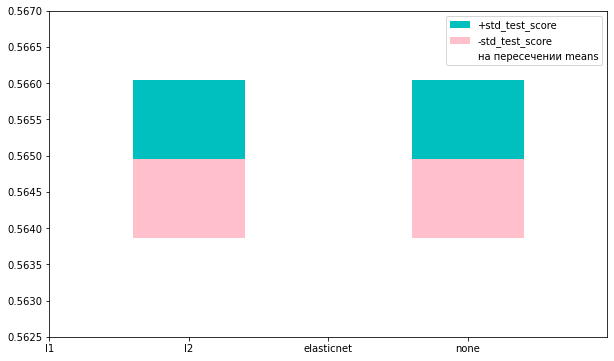

In [84]:
plt.figure(figsize=(10, 6))
xs = lg_grid_searcher.param_grid["penalty"]
print(xs)
print(means)
plt.bar(xs, means+stds, color = 'c')
plt.bar(xs, means, color = 'pink')
plt.bar(xs, means-stds, color='w')
plt.legend(['+std_test_score', '-std_test_score', 'на пересечении means'])
plt.show()

In [85]:
scores = cross_val_score(lg_grid_searcher, X_val_smaller, y_val, cv=5, n_jobs=1)
print('Оценки точности на 5 тестовых подмножествах:\n', scores)
print('Наилучшая оценка:', max(scores))

Оценки точности на 5 тестовых подмножествах:
 [0.57  0.57  0.575 0.571 0.567]
Наилучшая оценка: 0.575


In [86]:
rf_clf = RandomForestClassifier()
rf_grid = {"n_estimators": np.arange(1,100)}  # количество деревьев в лесу

In [87]:
rf_grid_searcher = GridSearchCV(rf_clf, param_grid=rf_grid, cv=5, return_train_score=True, n_jobs=-1) 
rf_grid_searcher.fit(X_train_smaller, y_train)
print('Наилучший параметр: ', rf_grid_searcher.best_params_["n_estimators"])

Наилучший параметр:  98


In [89]:
rf_clf = RandomForestClassifier(n_estimators=98)
rf_clf.fit(X_train_smaller, y_train)

RandomForestClassifier(n_estimators=98)

In [90]:
pred = rf_clf.predict(X_test_smaller)
mse  = mean_squared_error(pred, y_test)
print('Среднеквадратичная ошибка', mse)

Среднеквадратичная ошибка 0.3486


In [91]:
means = rf_grid_searcher.cv_results_['mean_test_score']
stds  = rf_grid_searcher.cv_results_['std_test_score']

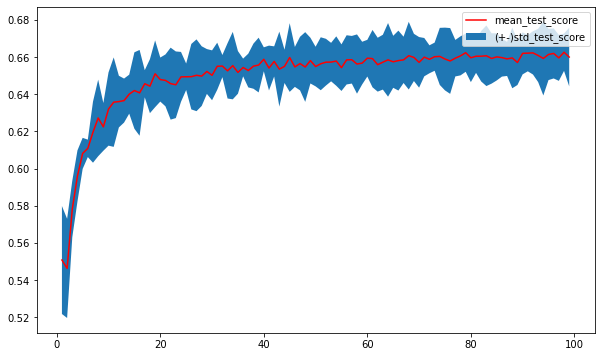

In [92]:
plt.figure(figsize=(10, 6))
xs = rf_grid_searcher.param_grid["n_estimators"]
plt.plot(xs, means, color = 'red')
plt.fill_between(xs, means + 3*stds, means - 3*stds)
plt.legend(['mean_test_score', '(+-)std_test_score'])
plt.show()

In [93]:
scores = cross_val_score(rf_grid_searcher, X_val_smaller, y_val, cv=5, n_jobs=1)
print('Оценки точности на 5 тестовых подмножествах:\n', scores)
print('Наилучшая оценка:', max(scores))

Оценки точности на 5 тестовых подмножествах:
 [0.643 0.637 0.622 0.638 0.631]
Наилучшая оценка: 0.643


Самая маленькая среднеквадратичная ошибка у RandomForestClassifier(n_estimators=98) равная 0.3486

Наилучшая оценка по cross_val_score у RandomForestClassifier(n_estimators=98) равная 0.643

**Task 2.3 [3 points] 2-D Grid Search** 

Now it's time to improve the models with a 2-D grid search. For each classifier we will look for an optimal **pair** of hyperparameters. However, going through the whole grid may be computationally expensive, so here are some ways to speed it up:

1. Make sparse grids with fewer number of parameters
2. Choose random subsample from grid points and look for the optimum there
3. Reduce number of folds in cross-validation
4. Make a greedy grid search (use two grid-searchers sequentially)

You have 4 models, 4 methods how to make grid search faster, choose one method per model and try it out.
Report whether you got boost in quality.

Here are default 2-D grids:
- kNN:
    - n_neighbors from 1 to 50
    - metric: `euclidean`, `manhattan` or `chebyshev`
    
- linear
    - penalty `l1`, `l2`, `elasticnet`, `none`
    - C from 0.001 to 1000
    
- dtree:
    - max_depth from 1 to 50
    - criterion `gini` or `entropy`

- rf
    - n_estimators from 1 to 200
    - max_features from 1 to 30
    


In [94]:
knn_clf = KNeighborsClassifier()
knn_grid = {"n_neighbors": np.arange(1,51),"metric": np.array(['euclidean', 'manhattan', 'chebyshev'])}

In [95]:
knn_grid_searcher = GridSearchCV(knn_clf, param_grid=knn_grid, cv=5, return_train_score=True, n_jobs=-1) 
knn_grid_searcher.fit(X_train_smaller, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': array(['euclidean', 'manhattan', 'chebyshev'], dtype='<U9'),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             return_train_score=True)

In [96]:
print('Наилучший параметр n_neighbors: ', knn_grid_searcher.best_params_["n_neighbors"])
print('Наилучший параметр metric: ',      knn_grid_searcher.best_params_["metric"])

Наилучший параметр n_neighbors:  37
Наилучший параметр metric:  manhattan


In [97]:
knn_clf = KNeighborsClassifier(n_neighbors = 37, metric = 'manhattan')
knn_clf.fit(X_train_smaller, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=37)

In [98]:
pred = knn_clf.predict(X_test_smaller)
mse  = mean_squared_error(pred, y_test)
print('Среднеквадратичная ошибка', mse)

Среднеквадратичная ошибка 0.4007


In [99]:
scores = cross_val_score(knn_grid_searcher, X_val_smaller, y_val, cv=5, n_jobs=1)
print('Оценки точности на 5 тестовых подмножествах:\n', scores)
print('Наилучшая оценка:', max(scores))

Оценки точности на 5 тестовых подмножествах:
 [0.581 0.582 0.576 0.577 0.584]
Наилучшая оценка: 0.584


Ошибка значительно понизилась, а оценка повысилась

In [100]:
lg_clf = LogisticRegression()
lg_grid = {"penalty": np.array(['l1', 'l2', 'elasticnet', 'none']),"C": np.logspace(-3, 3, endpoint=True, base = 10)} 

In [101]:
lg_grid_searcher = GridSearchCV(lg_clf, param_grid=lg_grid, cv=5, return_train_score=True, n_jobs=-1) 
lg_grid_searcher.fit(X_train_smaller, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-0...
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
                         'penalty': array(['l1', 'l2', 'elasticnet', 'none'], dtype='<U10')},
             return_train_score=True)

In [102]:
print('Наилучший параметр penalty: ',lg_grid_searcher.best_params_["penalty"])
print('Наилучший параметр C: ',      lg_grid_searcher.best_params_["C"])

Наилучший параметр penalty:  l2
Наилучший параметр C:  0.001


In [103]:
lg_clf = LogisticRegression(penalty = 'l2', C = 0.001)
lg_clf.fit(X_train_smaller, y_train)

LogisticRegression(C=0.001)

In [104]:
pred = lg_clf.predict(X_test_smaller)
mse  = mean_squared_error(pred, y_test)
print('Среднеквадратичная ошибка', mse)

Среднеквадратичная ошибка 0.429


In [106]:
scores = cross_val_score(lg_grid_searcher, X_val_smaller, y_val, cv=5, n_jobs=1)
print('Оценки точности на 5 тестовых подмножествах:\n', scores)
print('Наилучшая оценка:', max(scores))

c:\users\пользователь\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\пользователь\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Оценки точности на 5 тестовых подмножествах:
 [0.57  0.57  0.571 0.57  0.567]
Наилучшая оценка: 0.571


Ошибка понизилась, а точность совсем не значительно понизилась (на 0,004).

In [107]:
dt_clf = DecisionTreeClassifier()
dt_grid = {"max_depth": np.arange(1,51),"criterion": np.array(['gini','entropy'])}

In [108]:
dt_grid_searcher = GridSearchCV(dt_clf, param_grid=dt_grid, cv=5, return_train_score=True, n_jobs=-1) 
dt_grid_searcher.fit(X_train_smaller, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': array(['gini', 'entropy'], dtype='<U7'),
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             return_train_score=True)

In [109]:
print('Наилучший параметр max_depth: ',dt_grid_searcher.best_params_["max_depth"])
print('Наилучший параметр criterion: ',dt_grid_searcher.best_params_["criterion"])

Наилучший параметр max_depth:  5
Наилучший параметр criterion:  entropy


In [110]:
dt_clf = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy')
dt_clf.fit(X_train_smaller, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [111]:
pred = dt_clf.predict(X_test_smaller)
mse  = mean_squared_error(pred, y_test)
print('Среднеквадратичная ошибка', mse)

Среднеквадратичная ошибка 0.3611


In [112]:
scores = cross_val_score(dt_grid_searcher, X_val_smaller, y_val, cv=5, n_jobs=1)
print('Оценки точности на 5 тестовых подмножествах:\n', scores)
print('Наилучшая оценка:', max(scores))

Оценки точности на 5 тестовых подмножествах:
 [0.636 0.632 0.633 0.631 0.642]
Наилучшая оценка: 0.642


Существенно понизилась ошибка, точность незначительно повысилась.

In [113]:
rf_clf = RandomForestClassifier()
rf_grid = {"n_estimators": np.arange(1,200, 10),"max_features": np.arange(1,30,   5)}

In [114]:
rf_grid_searcher = GridSearchCV(rf_clf, param_grid=rf_grid, cv=5, return_train_score=True, n_jobs=-1) 
rf_grid_searcher.fit(X_train_smaller, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': array([ 1,  6, 11, 16, 21, 26]),
                         'n_estimators': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191])},
             return_train_score=True)

In [115]:
print('Наилучший параметр n_estimators: ',rf_grid_searcher.best_params_["n_estimators"])
print('Наилучший параметр max_features: ',rf_grid_searcher.best_params_["max_features"])

Наилучший параметр n_estimators:  161
Наилучший параметр max_features:  6


In [116]:
rf_clf = RandomForestClassifier(n_estimators = 161, max_features = 6)
rf_clf.fit(X_train_smaller, y_train)

RandomForestClassifier(max_features=6, n_estimators=161)

In [117]:
pred = rf_clf.predict(X_test_smaller)
mse  = mean_squared_error(pred, y_test)
print('Среднеквадратичная ошибка', mse)

Среднеквадратичная ошибка 0.3475


In [118]:
scores = cross_val_score(rf_grid_searcher, X_val_smaller, y_val, cv=5, n_jobs=1)
print('Оценки точности на 5 тестовых подмножествах:\n', scores)
print('Наилучшая оценка:', max(scores))

Оценки точности на 5 тестовых подмножествах:
 [0.628 0.656 0.622 0.631 0.65 ]
Наилучшая оценка: 0.656


Значительно понизилась ошибка, точность где-то повысилась, где-то понизилась.

**Task 2.4 [1 point] Categorical features**

Add categorical features and examine how the influence performance of each model. Preprocess the data before applying a model: we need to encode categorical features with one-hot encoding (`get_dummies` from `pandas` or `OneHotEncoder` from `sklearn`).

Don't forget to repeat the train-test-val splits.

Добавьте категориальные характеристики и изучите, как влияет на производительность каждой модели. Предварительно обработайте данные перед применением модели: нам нужно закодировать категориальные функции с помощью однократного кодирования (get_dummies из pandas или OneHotEncoder из sklearn).

Не забудьте повторить разделение train-test-val.

In [168]:
objects_with_dummies = pd.get_dummies(data)#, columns=None)

In [169]:
X = objects_with_dummies.drop(columns="damage_grade")
y = objects_with_dummies["damage_grade"]
assert X.shape == (35000, 69) and  y.shape == (35000,)

In [170]:
X = pd.DataFrame(st_scaler.fit_transform(X), columns=None)

In [171]:
X_train, X_not_train, y_train, y_not_train = train_test_split(X, y, test_size= 3/7, 
                                                    shuffle=True, stratify = None,
                                                    random_state = RANDOM_SEED)

X_test, X_val, y_test, y_val = train_test_split(X_not_train, y_not_train, test_size= 1/3,
                                                    shuffle=True, stratify= None,
                                                    random_state = RANDOM_SEED)

assert X_train.shape[0] == 20000 and X_test.shape[0] == 10000 and X_val.shape[0] == 5000

In [172]:
rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train)

RandomForestClassifier()

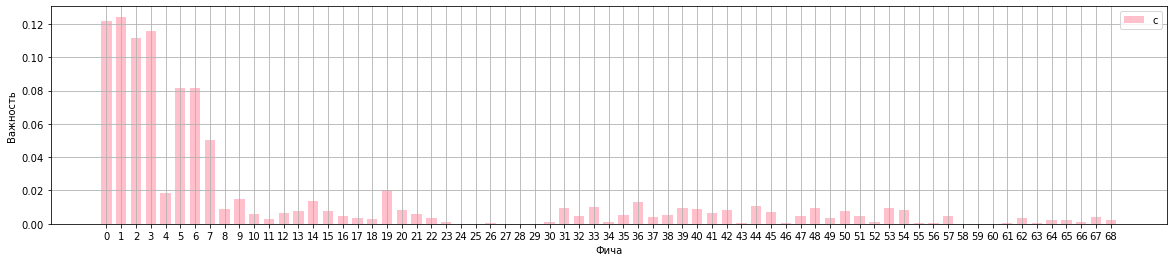

In [173]:
rfc_coefs = rfc.feature_importances_
ncoef = rfc_coefs.shape[0]
default_x = np.arange(ncoef)
plt.figure(figsize=(20,4))
plt.bar(default_x, rfc_coefs, label='model_name', width=0.7, color = 'pink')
plt.xticks(default_x)
plt.xlabel('Фича')
plt.ylabel('Важность')
plt.legend('coefs', loc='upper right')
plt.grid()
plt.show()

In [174]:
index = [0,1,2,3,5,6,7]

In [175]:
X_train_smaller = X_train[index] 
X_test_smaller  = X_test[index]
X_val_smaller   = X_val[index]

In [176]:
clf = KNeighborsClassifier()
grid = {"n_neighbors": np.arange(1,51),"metric": np.array(['euclidean', 'manhattan', 'chebyshev'])}
GSCV = GridSearchCV(clf, param_grid=grid, cv=5, return_train_score=True, n_jobs=-1) 
GSCV.fit(X_train_smaller, y_train)
k = list(grid.keys())
print('Наилучшие параметры', k[0], '=', GSCV.best_params_[k[0]])
print('Наилучший параметр', k[1], '=', GSCV.best_params_[k[1]])

Наилучшие параметры n_neighbors = 37
Наилучший параметр metric = manhattan


In [177]:
clf = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean')
clf.fit(X_train_smaller, y_train)
pred = clf.predict(X_test_smaller)
mse  = mean_squared_error(pred, y_test)
print('Среднеквадратичная ошибка', mse)
scores   = cross_val_score(GSCV, X_val_smaller, y_val, cv=5, n_jobs=1)
print('Оценки точности на 5 тестовых подмножествах:\n', scores, '\n')

Среднеквадратичная ошибка 0.5877
Оценки точности на 5 тестовых подмножествах:
 [0.581 0.582 0.576 0.577 0.584] 



In [178]:
clf = LogisticRegression()
grid = {"penalty": np.array(['l1', 'l2', 'elasticnet', 'none']), "C": np.logspace(-3, 3, endpoint=True, base = 10)}
GSCV = GridSearchCV(clf, param_grid=grid, cv=5, return_train_score=True, n_jobs=-1) 
GSCV.fit(X_train_smaller, y_train)
k = list(grid.keys())
print('Наилучшие параметры', k[0], '=', GSCV.best_params_[k[0]])
print('Наилучший параметр', k[1], '=', GSCV.best_params_[k[1]])

Наилучшие параметры penalty = l2
Наилучший параметр C = 0.001


In [179]:
clf = LogisticRegression(penalty = GSCV.best_params_[k[0]], C = GSCV.best_params_[k[1]])
clf.fit(X_train_smaller, y_train)
pred = clf.predict(X_test_smaller)
mse  = mean_squared_error(pred, y_test)
print('Среднеквадратичная ошибка', mse)
scores   = cross_val_score(GSCV, X_val_smaller, y_val, cv=5, n_jobs=1)
print('Оценки точности на 5 тестовых подмножествах:\n', scores, '\n')

Среднеквадратичная ошибка 0.429


c:\users\пользователь\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\пользователь\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Оценки точности на 5 тестовых подмножествах:
 [0.57  0.57  0.571 0.57  0.567] 



In [180]:
clf = DecisionTreeClassifier()
grid = {"max_depth": np.arange(1,51),"criterion": np.array(['gini','entropy'])}
GSCV = GridSearchCV(clf, param_grid=grid, cv=5, return_train_score=True, n_jobs=-1) 
GSCV.fit(X_train_smaller, y_train)
k = list(grid.keys())
print('Наилучшие параметры', k[0], '=', GSCV.best_params_[k[0]])
print('Наилучший параметр', k[1], '=', GSCV.best_params_[k[1]])
clf =  DecisionTreeClassifier(max_depth = GSCV.best_params_[k[0]], criterion = GSCV.best_params_[k[1]])
clf.fit(X_train_smaller, y_train)
pred = clf.predict(X_test_smaller)
mse  = mean_squared_error(pred, y_test)
print('Среднеквадратичная ошибка', mse)
scores   = cross_val_score(GSCV, X_val_smaller, y_val, cv=5, n_jobs=1)
print('Оценки точности на 5 тестовых подмножествах:\n', scores, '\n')

Наилучшие параметры max_depth = 5
Наилучший параметр criterion = entropy
Среднеквадратичная ошибка 0.3611
Оценки точности на 5 тестовых подмножествах:
 [0.636 0.632 0.633 0.631 0.642] 



In [182]:
clf = RandomForestClassifier()
grid = {"n_estimators": np.arange(1,200, 20),"max_features": np.arange(1,30, 5)}
GSCV = GridSearchCV(clf, param_grid=grid, cv=5, return_train_score=True, n_jobs=-1) 
GSCV.fit(X_train_smaller, y_train)
k = list(grid.keys())
print('Наилучшие параметры', k[0], '=', GSCV.best_params_[k[0]])
print('Наилучший параметр', k[1], '=', GSCV.best_params_[k[1]])
clf =  RandomForestClassifier(n_estimators = GSCV.best_params_[k[0]], max_features = GSCV.best_params_[k[1]])
clf.fit(X_train_smaller, y_train)
pred = clf.predict(X_test_smaller)
mse  = mean_squared_error(pred, y_test)
print('Среднеквадратичная ошибка', mse)
scores   = cross_val_score(GSCV, X_val_smaller, y_val, cv=5, n_jobs=1)
print('Оценки точности на 5 тестовых подмножествах:\n', scores, '\n')

Наилучшие параметры n_estimators = 181
Наилучший параметр max_features = 6
Среднеквадратичная ошибка 0.3545
Оценки точности на 5 тестовых подмножествах:
 [0.639 0.639 0.611 0.634 0.64 ] 



What was your best model before adding categorical features?

Use GridSearch + 5-fold CV on **train set** to define your new best model.

In [ ]:
pass

Performance of which model increased the most? Why?

Производительность какой модели повысилась больше всего? Почему?

**Your answer here**:

**Task 2.5 [2 point] Blending**

Since you have already trained and tuned a lot of models, it might be useful to **blend** two best classifiers to get one even better.

Pick two best models, say, `clf_a` and `clf_b`, train them on the `train_set`.

Then use `Voting classifier` to build 
$$
clf_c(\alpha) = \alpha \cdot clf_a + (1 - \alpha) \cdot clf_b
$$
You will have to tune $\alpha$ using grid search on `test_set` and then make final quality assessment on `val_set`.

Поскольку вы уже обучили и настроили множество моделей, может быть полезно смешать два лучших классификатора, чтобы сделать один еще лучше.

Выберите две лучшие модели, скажем, clf_a и clf_b, обучите их на train_set.

Затем используйте классификатор голосования для создания

𝑐𝑙𝑓𝑐 (𝛼) = 𝛼⋅𝑐𝑙𝑓𝑎 + (1 − 𝛼) ⋅𝑐𝑙𝑓𝑏
 
Вам нужно будет настроить 𝛼, используя поиск по сетке на test_set, а затем произвести окончательную оценку качества на val_set.

In [186]:
data    = pd.read_csv("richters_sample.csv")
objects = data.drop(columns="damage_grade")
labels  = data["damage_grade"]
X = objects._get_numeric_data()
y = labels
assert X.shape == (35000, 31) and  y.shape == (35000,)
X = pd.DataFrame(scaler.fit_transform(X), columns=None)
X_train, X_not_train, y_train, y_not_train = train_test_split(X, y, test_size= 3/7, 
                                                    shuffle=True, stratify = None,
                                                    random_state = RANDOM_SEED)

X_test, X_val, y_test, y_val = train_test_split(X_not_train, y_not_train, test_size= 1/3,
                                                    shuffle=True, stratify= None,
                                                    random_state = RANDOM_SEED)

assert X_train.shape[0] == 20000 and X_test.shape[0] == 10000 and X_val.shape[0] == 5000


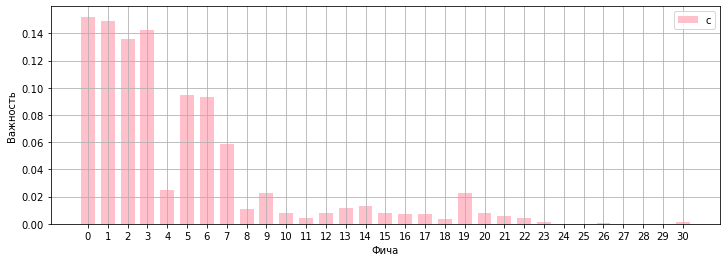

In [187]:
rfc = RandomForestClassifier() #LinearRegression()
rfc.fit(X_train, y_train)
rfc_coefs = rfc.feature_importances_  # возвращает вектор "важностей" признаков
ncoef = rfc_coefs.shape[0]
default_x = np.arange(ncoef)
plt.figure(figsize=(12,4))
plt.bar(default_x, rfc_coefs, label='model_name', width=0.7, color = 'pink')
plt.xticks(default_x)
plt.xlabel('Фича')
plt.ylabel('Важность')
plt.legend('coefs', loc='upper right')
plt.grid()
plt.show()

In [188]:
index = [0, 1, 2, 3, 5, 6, 7]
X_train_smaller = X_train[index] 
X_test_smaller  = X_test[index]
X_val_smaller   = X_val[index]

In [222]:
clf_a = RandomForestClassifier(n_estimators = 1, max_features = 1)
clf_b = DecisionTreeClassifier(max_depth = 3, criterion = 'gini')
clf_a.fit(X_train_smaller, y_train)
clf_b.fit(X_train_smaller, y_train)

DecisionTreeClassifier(max_depth=3)

In [229]:
from sklearn.ensemble import VotingClassifier
clf_c = VotingClassifier(estimators=[('lr', clf_a), 
                                     ('rf', clf_b)], 
                                     voting ='hard')

In [1]:
w1 = np.linspace(0,1,11)
w2 = 1-w1
w = np.transpose(np.array([w1,w2]))
params = {"weights": w}
grid = GridSearchCV(estimator=clf_c, param_grid=params, cv=5, n_jobs=-1)
grid = grid.fit(X_train_smaller, y_train)
print (grid.best_params_)

NameError: name 'np' is not defined

In [224]:
clf_c = clf_c.fit(X_train_smaller, y_train)

In [225]:
pred = clf_c.predict(X_test_smaller)
mse  = mean_squared_error(pred, y_test)
print('Среднеквадратичная ошибка', mse)

Среднеквадратичная ошибка 0.479


In [227]:
scores   = cross_val_score(clf_c, X_val_smaller, y_val, cv=5, n_jobs=1)
print('Оценки точности на 5 тестовых подмножествах:\n', scores, '\n')

Оценки точности на 5 тестовых подмножествах:
 [0.56  0.576 0.56  0.551 0.574] 



What was the best pair of models to blend? Did blending help to increase quality of each classifier?

**Your answer here**:

Не особо 

**Очень надеюсь, что не будет больше таких объемных домашек. 
Физически не успеваю делать (не только я).
Плюс начались коллоки и всякие проверочные работы. 
Если объем дз не уменьшится, то, скорее всего, покину курс.
Спасибо за понимание))**